## 0. 课程大纲

### 0.1 质心、弧长、面积、轮廓近似
```python
cv.moments(cnt)
cv.arcLength(cnt, isClosed)
cv.contourArea(cnt)
cv.approxPolyDP(cnt, epsilon, isClosed)
```

### 0.2 外接矩形、最小外接矩形、凸包、外接圆、拟合椭圆
```python
x, y, w, h = cv.boundingRect(cnt)
cv.boxPoints(cv.minAreaRect(cnt))
cv.convexHull(cnt)
cv.minEnclosingCircle(cnt)
cv.fitEllipse(cnt)
```

### 0.3 实战：轮廓匹配
```python
cv.matchShapes(cnt1, cnt2, method, param)
```

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

In [3]:
def binary(img, thresh=127):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, img_bin = cv.threshold(img_gray, thresh, 255, 0)
    return img_bin

## 10. 轮廓

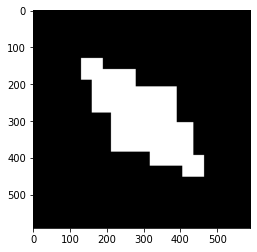

In [4]:
img = cv.imread('pic/test1_bin.png', -1)

show(img)

### 10.1.1 矩与质心

In [5]:
contours, hier = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

In [6]:
M = cv.moments(cnt)
print(M)

{'m00': 53447.0, 'm10': 15848778.5, 'm01': 15580724.0, 'm20': 5050616598.333333, 'm11': 4845088322.583333, 'm02': 4861365213.833333, 'm30': 1705594295435.25, 'm21': 1605099261118.4167, 'm12': 1571919574997.0833, 'm03': 1602869469513.0, 'mu20': 350936916.7410593, 'mu11': 224895541.9663849, 'mu02': 319314951.6263609, 'mu30': -206716356.10302734, 'mu21': -620470746.3444214, 'mu12': -755621329.5012512, 'mu03': -474140430.78564453, 'nu20': 0.12285204492844944, 'nu11': 0.07872889943422058, 'nu02': 0.11178218338446366, 'nu30': -0.0003130159788938229, 'nu21': -0.000939535031012167, 'nu12': -0.0011441840142006172, 'nu03': -0.0007179573686057923}


In [10]:
M['mu21'] / M['m00']**(2.5)d

-0.0009395350310121668

In [18]:
cnt = np.array([
    [[0, 0]],
    [[3, 0]],
    [[3, 3]],
    [[0, 3]]
])

M2 = cv.moments(cnt + 2)

In [17]:
M

{'m00': 9.0,
 'm10': 13.5,
 'm01': 13.5,
 'm20': 27.0,
 'm11': 20.25,
 'm02': 27.0,
 'm30': 60.75,
 'm21': 40.5,
 'm12': 40.5,
 'm03': 60.75,
 'mu20': 6.75,
 'mu11': 0.0,
 'mu02': 6.75,
 'mu30': 0.0,
 'mu21': 0.0,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.08333333333333333,
 'nu11': 0.0,
 'nu02': 0.08333333333333333,
 'nu30': 0.0,
 'nu21': 0.0,
 'nu12': 0.0,
 'nu03': 0.0}

In [43]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

296 291


### 10.1.2 轮廓弧长

In [44]:
arcLenT = cv.arcLength(cnt, closed=True)
arcLenF = cv.arcLength(cnt, closed=False)
print(arcLenF, arcLenT)

1243.313708305359 1301.313708305359


### 10.1.3 轮廓面积

In [45]:
area = cv.contourArea(cnt)
print(area)

53447.0


In [38]:
img = cv.imread('pic/irregular_rect_bin.png', -1)

cnts, hiers = cv.findContours(img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
cnt = cnts[0]
# 轮廓近似
epsilon = 0.1*cv.arcLength(cnt, True)
cnt_approx = cv.approxPolyDP(cnt, epsilon, True)

print(len(cnt), len(cnt_approx))

356 4


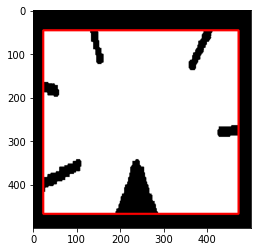

In [42]:
img2 = cv.merge([img, img, img])
cv.drawContours(img2, [cnt], 0, (0,0,255), 3)
img3 = cv.merge([img, img, img])
cv.drawContours(img3, [cnt_approx], 0, (0,0,255), 3)

show(img3)

In [43]:
cv.imwrite("pic/countour_approx.jpg", np.hstack([img2, img3]))

True

### 10.5 凸包

In [10]:
img = cv.imread('pic/test1_bin.png', -1)
bgr = cv.merge([img, img, img])

cnts,hier = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = cnts[0]

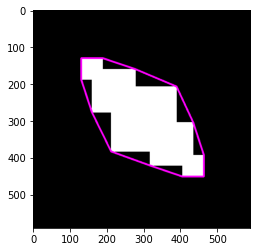

In [11]:
# print(cv.isContourConvex(cnt))
hull = cv.convexHull(cnt)

img1 = cv.drawContours(bgr.copy(), [hull], 0, (255, 0, 255), 3)
show(img1)

In [12]:
area = cv.contourArea(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area) / hull_area

print(f"solidity = {solidity}")

solidity = 0.7834391169874378


In [106]:
cv.imwrite('pic/test_convex_hull.jpg', np.hstack([img_bak, img]))

True

### 10.6 Bounding矩形

In [13]:
img_bak = img.copy()

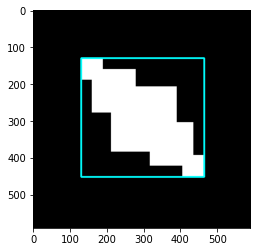

In [14]:
img = img_bak.copy()

x, y, w, h = cv.boundingRect(cnt)
img2 = cv.rectangle(bgr.copy(), (x,y), (x+w, y+h), (255, 255, 0), 3)
show(img2)

In [9]:
aspect_ratio = float(w) / h

area = cv.contourArea(cnt)
rect_area = w*h
extent = float(area) / rect_area

print(f"aspect_ratio = {aspect_ratio}")
print(f"extend = {extent}")

aspect_ratio = 1.0341614906832297
extend = 0.4984518680170854


### 10.7 最小范围矩形

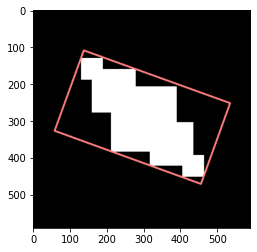

In [29]:
img = img_bak.copy()

rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int64(box)
img3 = cv.drawContours(bgr.copy(), [box], 0, (127, 127, 255), 3)
show(img3)

In [23]:
rect

((296.05792236328125, 290.3399658203125),
 (232.1504364013672, 421.4224853515625),
 -70.10456848144531)

In [24]:
cv.boxPoints(rect)

array([[454.69202 , 471.19327 ],
       [ 58.422   , 327.78128 ],
       [137.42383 , 109.486664],
       [533.69385 , 252.89865 ]], dtype=float32)

In [18]:
np.int0(cv.boxPoints(rect))

array([[454, 471],
       [ 58, 327],
       [137, 109],
       [533, 252]], dtype=int64)

### 10.8 最小外接圆

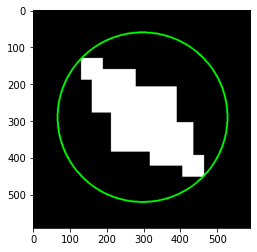

In [21]:
img = img_bak.copy()

(x,y), r = cv.minEnclosingCircle(cnt)
center = (int(x), int(y))
r = int(r)
img4 = cv.circle(bgr.copy(), center, r, (0, 255, 0), 3)
show(img4)

### 10.9 拟合椭圆

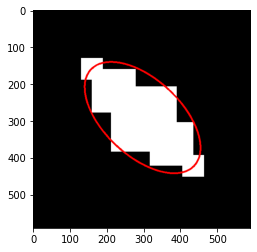

In [76]:
img = img_bak.copy()

ellipse = cv.fitEllipse(cnt)
img5 = cv.ellipse(bgr.copy(), ellipse, (0, 0, 255), 3)
show(img5)

In [125]:
# 朝向
(x, y), (MA, ma), angle = ellipse
# MA, ma 长短轴
print(f"oritation = {angle}")

oritation = 125.7054443359375


In [78]:
com1 = np.hstack([bgr, img1, img2])
com2 = np.hstack([img3, img4, img5])

cv.imwrite('pic/test1_hull_rect.jpg', com1)
cv.imwrite('pic/test1_rect_circle_ellipse.jpg', com2)

True

### 10.10 点到轮廓距离

In [121]:
din = cv.pointPolygonTest(hull, (300,300), True) # False
dout = cv.pointPolygonTest(hull, (100, 100), True)
dggh = cv.pointPolygonTest(hull, (188, 130), True)
print(din, dout, dggh)

108.3332739450084 -42.42640687119285 -0.0


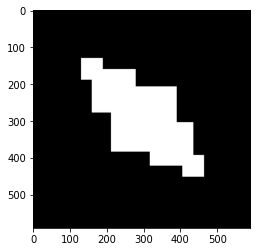

In [120]:
show(img_bak)

### 10.11 实践：轮廓匹配

The difference socre = 0.001


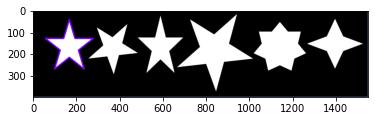

The difference socre = 0.053


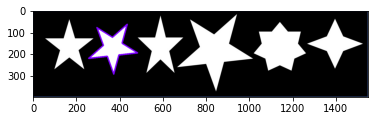

The difference socre = 1.121


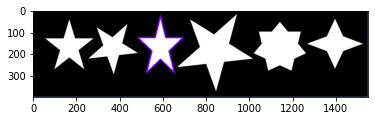

The difference socre = 0.049


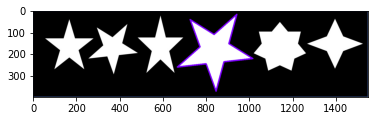

The difference socre = 0.751


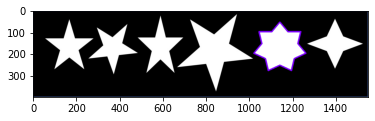

The difference socre = 0.314


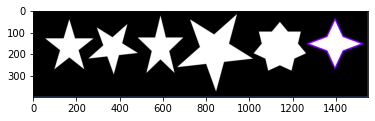

In [34]:
import cv2 as cv
import numpy as np

img1 = cv.imread('pic/star.png', -1)
img2 = cv.imread('pic/stars.png', -2)

cnts1, hie1 = cv.findContours(img1, 2, 1)
cnts2, hie2 = cv.findContours(img2, 2, 1)

# print(len(cnts1), len(cnts2))

cnt1 = cnts1[0]

cnts2 = sorted(cnts2, key=lambda c:c[:, 0, 0].min())


for cnt in cnts2:
    score = cv.matchShapes(cnt1, cnt, cv.CONTOURS_MATCH_I2, 0.0)
    print('The difference socre = %5.3f' % score)
    
    img_temp = cv.imread('pic/stars.jpg')
    cv.drawContours(img_temp, [cnt], 0, (255,0,125), 5)
    show(img_temp)

## 字符分割

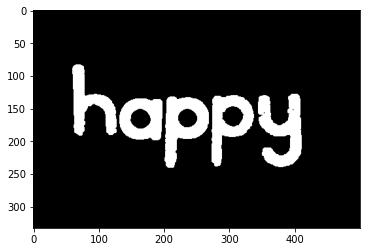

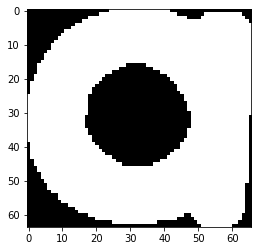

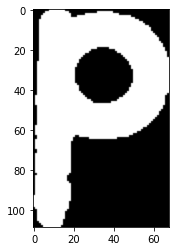

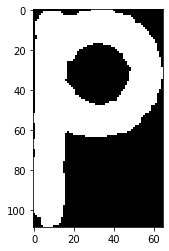

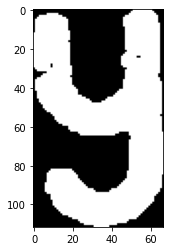

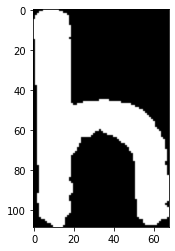

In [112]:
img = cv.imread('pic/word_happy_bin.png', -1)
show(img)

cnts, hiers = cv.findContours(img, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

areaTh = 2000
words = []

for c, h in zip(cnts, hiers[0]):
    if cv.contourArea(c) > areaTh and h[3] == -1:
        x, y, w, h = cv.boundingRect(c)
        word = img[y:y+h, x:x+w]
        words.append(word)

for w in words:
    show(w)